#code#4 

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

#saving dataset as csv file
path='/content/drive/MyDrive/assignments/'
#reading csv file
dfrm=pd.read_csv(path+'data.csv')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dfrm.head()
#import the data

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# checking the correlation of feature with each other

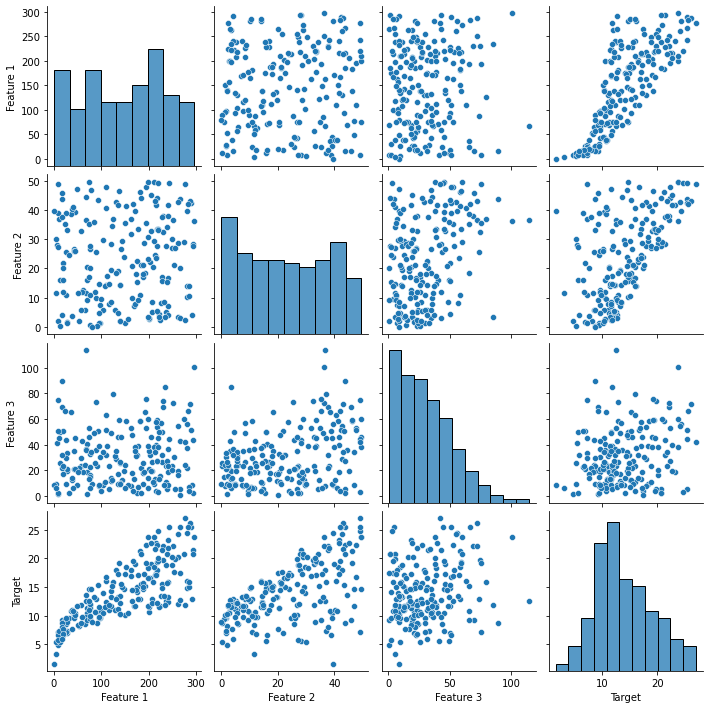

In [4]:
sns.pairplot(dfrm.iloc[:,:])

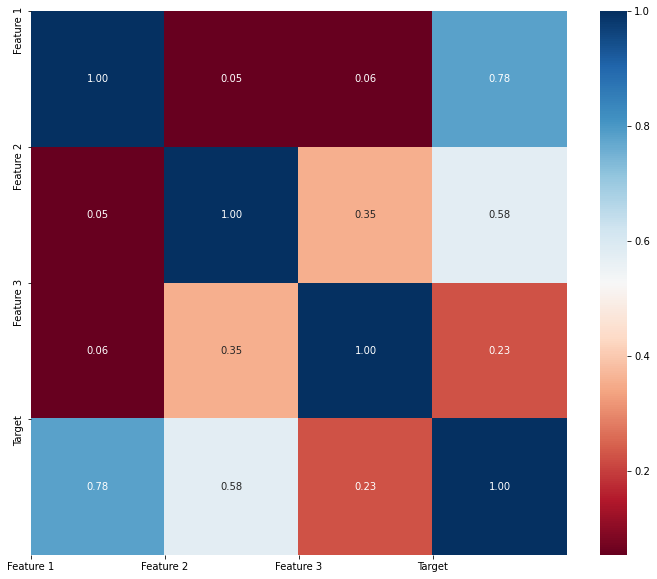

In [ ]:

corr = dfrm.corr()
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt = ".2f")
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

# Separating the data

In [6]:
target="Target"
#x is all indept vars
x=dfrm.loc[:, dfrm.columns != target]
y=dfrm.loc[:,target]

In [7]:
x=dfrm.loc[:,dfrm.columns!=target]
y=dfrm.loc[:,target]


In [8]:
xtrain,xtest,ytrian,ytest=train_test_split(x,y,test_size=0.30, random_state=42)                                           

In [10]:
xtrain2=sm.add_constant(xtrain)
model = sm.OLS(ytrian,xtrain2)
resul=model.fit()
resul.params
print(resul.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.88e-69
Time:                        14:24:21   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

# What we should understand from the above summay is:


if the model is realy well then we will have a R-squared value which is closer to one.
if we add more features for better prediction, then R-squared value will get closer to one.

if adj R-squared is less then R-squared then that feature might not be relevent to model.


t test and P>|X|

In order to undertad whether a feature is relevent to target variable or not t test can help us.it checks every feature with target variable independent of other features.

H0:  feature coef value=0
H1:  feature coef value =\=0

Higher t value, indicates we may reject the null hypo.
lower t value indiactes the feature is having coef of less than 0.
lower the P>|t| we reject null hypo.


In [11]:
xtest=sm.add_constant(xtest)
ypredict=resul.predict(xtest)
pdata={
    "Target":ypredict[0:]
}
predictdf=pd.DataFrame(pdata)
predictdf.head()

,Target
95,16.565396
15,21.188228
30,21.551071
158,10.889238
128,22.202320


In [12]:
residualerror=ytest - ypredict
#residualerror=y-yhat

# Verifying the Assumptions of Linear Regression

1.Low or NO Multicolinearity

In [20]:
#Lower or No multicolinearity assumtion test using
#vif(variance inflation factor)

#using vif we can verify this assumption
#if vif>10, it means heavy multicoy between that feature and other features
#vif<=5, indicates very low relation of that feature wiht others

vif=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vifdata={
    "VIF value": vif[0:]
}
pd.DataFrame(vifdata,index=xtrain.columns).T

,Feature 1,Feature 2,Feature 3
VIF value,2.697679,3.473818,3.162643


from the VIF values we can understadnd that the independent variables have very low colinearity with each other, it means this assumption for the linear regression is true.

2.Normality of residual

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


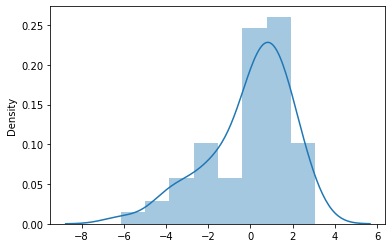

In [21]:
 sns.distplot(residualerror) 

In [22]:
np.mean(residualerror)

-0.03848895253439794

As we can see from the graph and the mean value, overall it is normally distribued which holds the assumption of residual error normally distributed as true.

3.Homescedasticity

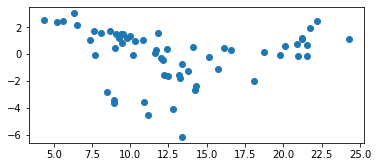

In [23]:
#it is all about constant variance
#predicitons on x-axis
#residuals on the y-axis

fig, ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(ypredict,residualerror) 

the variance is almost constant at the extend that holds the assumption true

4.No autocorrelation of residuals

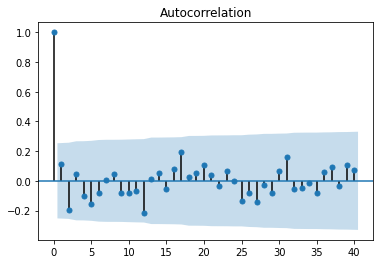

In [18]:
#it refers to the degree of correlation between individual variable
#with others
acfunc=smt.graphics.plot_acf(residualerror, lags=40,alpha=0.05)

as the graph of acf shows,
non of the lag or datapoint is crossing from the blue border in order to be autucorrelated.


#code#5 

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from word2number import w2n


#saving dataset as csv file
path='/content/drive/MyDrive/assignments/'
#reading csv file
dfrm2=pd.read_csv(path+'hiring.csv')

dfrm2.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

In [ ]:
#dealing with null values
dfrm2.experience=dfrm2.experience.fillna("zero")
dfrm2["test_score(out of 10)"]=dfrm2["test_score(out of 10)"].fillna(dfrm2["test_score(out of 10)"].median())
dfrm2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


# checking the correlation of feature with each other

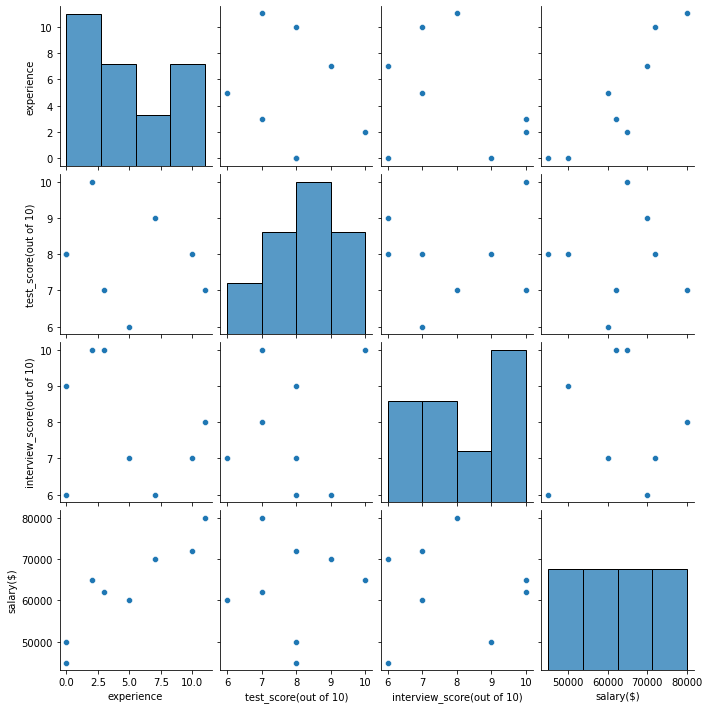

In [ ]:
sns.pairplot(dfrm2.iloc[:,:])

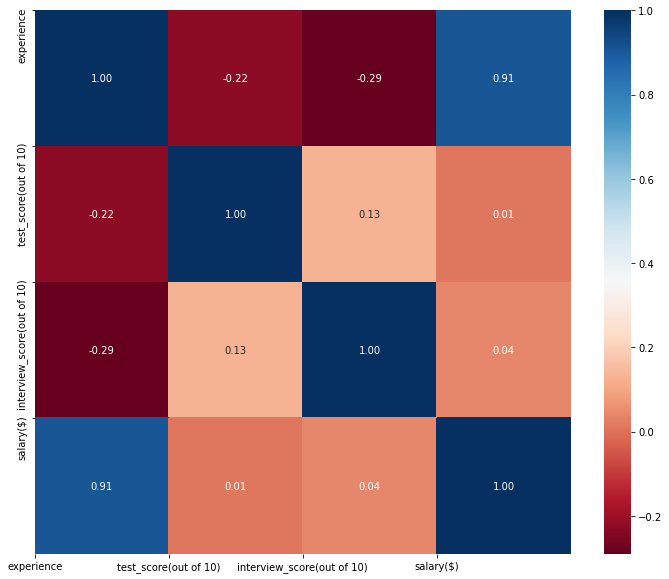

In [ ]:
corr = dfrm2.corr()
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt = ".2f")
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

# Separating the data

In [ ]:
target2="salary($)"
#x is all indept vars
x2=dfrm2.loc[:,dfrm2.columns != target]
y2=dfrm2.loc[:,target2]

In [ ]:
x2=dfrm2.loc[:,dfrm2.columns!=target2]
y2=dfrm2.loc[:,target2]

In [ ]:
xtrain2,xtest2,ytrian2,ytest2=train_test_split(x2,y2,test_size=0.50, random_state=20)                                           

In [ ]:
xtrain22=sm.add_constant(xtrain2)
model = sm.OLS(ytrian2,xtrain22)
resul=model.fit()
resul.params
print(resul.summary())

                            OLS Regression Results                            
Dep. Variable:              salary($)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sat, 13 Mar 2021   Prob (F-statistic):                nan
Time:                        09:58:08   Log-Likelihood:                 87.950
No. Observations:                   4   AIC:                            -167.9
Df Residuals:                       0   BIC:                            -170.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


# What we should understand from the above summay is:


if the model is realy well then we will have a R-squared value which is closer to one.
if we add more features for better prediction, then R-squared value will get closer to one.

if adj R-squared is less then R-squared then that feature might not be relevent to model.


t test and P>|X|

In order to undertad whether a feature is relevent to target variable or not t test can help us.it checks every feature with target variable independent of other features.

H0:  feature coef value=0
H1:  feature coef value =\=0

Higher t value, indicates we may reject the null hypo.
lower t value indiactes the feature is having coef of less than 0.
lower the P>|t| we reject null hypo.


In [ ]:
xtest2=sm.add_constant(xtest2)
ypredict2=resul.predict(xtest2)
pdata={
    "Salary($)":ypredict2[0:]
}
predictdf=pd.DataFrame(pdata)
predictdf

,Salary($)
5,59389.830508
7,71084.745763
0,57389.830508
1,57440.677966


In [ ]:
residualerror2=ytest - ypredict
#residualerror=y-yhat
residualerror2.head()

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
dtype: float64

# Verifying the Assumptions of Linear Regression

1.Low or NO Multicolinearity

In [ ]:
#Lower or No multicolinearity assumtion test using
#vif(variance inflation factor)

#using vif we can verify this assumption
#if vif>10, it means heavy multicoy between that feature and other features
#vif<=5, indicates very low relation of that feature wiht others

vif=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]


In [ ]:
vifdata={
    "VIF value": vif[0:]
}
pd.DataFrame(vifdata,index=xtrain2.columns).T

,experience,test_score(out of 10),interview_score(out of 10)
VIF value,2.697679,3.473818,3.162643


2.Normality of residual

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


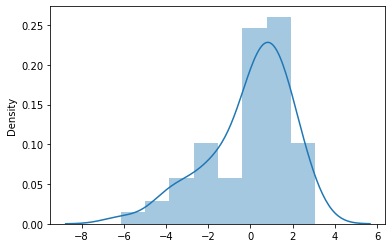

In [ ]:
 sns.distplot(residualerror) 

In [ ]:
np.mean(residualerror)

-0.03848895253439794